In [1]:
from matplotlib import pyplot as plt
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Computer Modern Roman",
  "font.size":    14.0
})
import sys
sys.path.append('..')

from geminids.read_data import *

In [2]:
fig_pth = "../figs"

In [3]:
def rate_at_destiny(points, KDTrees, masses, r=0.05, n=8000, norm=1e15):
    """
    Takes a list of sets of points and a list of KDTrees and returns
        a list of the rate of impacts at DESTINY+

    Args:
        points (list of ndarray): The filtered pointes
        KDTrees (list of KDTrees): The kd tree of points
        masses (ndarray): The unnormalized masses
        r (float, optional): The search radius. Defaults to 0.05.
        n (int, optional): The temporal resolution. Defaults to 8000.
        norm (float or ndarray, optional): The mass to normalize to.
                        If an array, must be the same length as points.
                        Defaults to 1e15

    Returns:
        rates(list of ndarray): The rate of impact at each moment in time
        t(ndarray): The times for which these calculations were done
    """
    p_vel = 3.5e4 # 35 km/s (geminids at Earth)
    spice.furnsh("data/meta.tm")
    dest = np.load("data/destiny.npy")
    t_d = np.load("data/t-dest.npy")
    norms = norm/np.array(masses)

    n_particles = np.zeros((len(KDTrees), n))
    rates = np.zeros((len(KDTrees), n))

    t = []
    for i in tqdm(range(int(dest.shape[0]/10))):
        t.append(t_d[i*10])

        for k in range(len(KDTrees)):
            n_particles[k, i] = np.sum(points[k][KDTrees[k].query_ball_point(dest[i*10, :3], r), 4])

        V = 4/3 * np.pi * ((r*AU_TO_M)**3)

        v_dest = np.sqrt(np.sum(dest[i,3:]**2))
        for k in range(len(KDTrees)):
            rates[k, i] = (n_particles[k, i]/V * norms[k]
                            * 5 * (p_vel + v_dest))


    return rates, np.array(t)

def plot_at_dest(rates, t, labels):
    """
    Plots the estimated meteoriod fluxes of each model suplied in rates at
        psp during orbit 4

    Args:
        rates (list of ndarray): The rates at earth for each model
        t (ndarray): The times the rates were calculated for
        labels (list of strings): The labels for each model for plotting


    Returns:
        None
    """
    spice.furnsh("data/meta.tm")
    x2 = mdates.datestr2num(spice.et2utc(t, "C", 3))

    beg  = 45
    end = 60
    for i in range(len(rates)):
            plt.plot(x2,rates[i], label=labels[i])


    # plt.legend(loc=4)
    plt.yscale("log")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
    plt.gcf().autofmt_xdate()
    plt.xlabel("Date")
    plt.ylabel(r"Impact rate (s$^{-1}$)")

## Load Data

In [4]:
points, elements, masses = load_all_data()


Loaded ../output/cached/points_0.npy
Loaded ../output/cached/mass_0.npy
Loaded ../output/cached/elements_0.npy
Loaded ../output/cached/points_1.npy
Loaded ../output/cached/mass_1.npy
Loaded ../output/cached/elements_1.npy
Loaded ../output/cached/points_2.npy
Loaded ../output/cached/mass_2.npy
Loaded ../output/cached/elements_2.npy


In [5]:
dest = np.load("data/destiny.npy")
dest.shape

(80000, 6)

In [6]:
dest = np.load("data/destiny.npy")

In [7]:
np.sqrt(dest[:,0]**2 + dest[:,1]**2 + dest[:,2]**2)

array([0.98527066, 0.98526318, 0.9852557 , ..., 1.33040446, 1.33041668,
       1.3304289 ])

## PSP

In [8]:
points_kd = []
KDTrees = []
for i in range(3):
    point_kd, KDTree = generate_KDTree(points[i], 0, 0.9, 1.4)
    points_kd.append(point_kd)
    KDTrees.append(KDTree)

# rates, t = rate_at_destiny(points, KDTrees, masses, n=8000, r =0.05, norm = 1e14)

# plot_at_dest(rates, t, ["Basic Model", "Violent Creation", "Cometary Creation"])
# plt.tight_layout()
# # plt.savefig(f"{fig_pth}/rate_at_psp.eps")

In [9]:
for i in np.linspace(0,0.0025,200)[1:]:
    print(f"Search Radius: {i} AU.")
    print("-------------------------")
    rates, t = rate_at_destiny(points, KDTrees, masses, n=8000, r =i, norm = 1e14)

    dt=t[2] - t[1]

    print([np.sum(dt*j) for j in rates])

  0%|          | 0/8000 [00:00<?, ?it/s]

Search Radius: 1.2562814070351759e-05 AU.
-------------------------


  1%|          | 80/8000 [00:00<00:09, 799.28it/s]

[0.0, 0.0, 0.0]
Search Radius: 2.5125628140703518e-05 AU.
-------------------------


  1%|          | 96/8000 [00:00<00:08, 958.79it/s]

[0.0, 0.0, 0.0]
Search Radius: 3.768844221105528e-05 AU.
-------------------------


  1%|          | 94/8000 [00:00<00:08, 933.16it/s]

[0.0, 0.0, 0.0]
Search Radius: 5.0251256281407036e-05 AU.
-------------------------


  1%|          | 84/8000 [00:00<00:09, 839.55it/s]

[0.0, 0.0, 0.0]
Search Radius: 6.28140703517588e-05 AU.
-------------------------


  1%|▏         | 102/8000 [00:00<00:07, 1016.80it/s]

[0.0, 0.0, 0.0]
Search Radius: 7.537688442211056e-05 AU.
-------------------------


  1%|          | 96/8000 [00:00<00:08, 956.16it/s]

[0.0, 0.0, 0.0]
Search Radius: 8.793969849246232e-05 AU.
-------------------------


  1%|          | 96/8000 [00:00<00:08, 953.75it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00010050251256281407 AU.
-------------------------


  1%|▏         | 102/8000 [00:00<00:07, 1015.67it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00011306532663316583 AU.
-------------------------


  1%|          | 97/8000 [00:00<00:08, 964.97it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.0001256281407035176 AU.
-------------------------


  1%|          | 98/8000 [00:00<00:08, 979.21it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00013819095477386934 AU.
-------------------------


  1%|          | 98/8000 [00:00<00:08, 976.56it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00015075376884422112 AU.
-------------------------


  1%|          | 99/8000 [00:00<00:08, 985.55it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00016331658291457286 AU.
-------------------------


  1%|▏         | 104/8000 [00:00<00:07, 1036.65it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00017587939698492463 AU.
-------------------------


  1%|▏         | 101/8000 [00:00<00:07, 1007.17it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00018844221105527637 AU.
-------------------------


  1%|▏         | 102/8000 [00:00<00:07, 1016.61it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00020100502512562814 AU.
-------------------------


  1%|          | 90/8000 [00:00<00:08, 893.75it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00021356783919597992 AU.
-------------------------


  1%|          | 82/8000 [00:00<00:09, 817.79it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00022613065326633166 AU.
-------------------------


  1%|          | 92/8000 [00:00<00:08, 915.63it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00023869346733668343 AU.
-------------------------


  1%|          | 68/8000 [00:00<00:11, 677.57it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.0002512562814070352 AU.
-------------------------


  1%|          | 86/8000 [00:00<00:09, 851.27it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00026381909547738695 AU.
-------------------------


  1%|          | 91/8000 [00:00<00:08, 906.18it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.0002763819095477387 AU.
-------------------------


  1%|          | 83/8000 [00:00<00:09, 825.73it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00028894472361809043 AU.
-------------------------


  1%|          | 91/8000 [00:00<00:08, 908.23it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00030150753768844223 AU.
-------------------------


  1%|          | 81/8000 [00:00<00:09, 808.76it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.000314070351758794 AU.
-------------------------


  1%|          | 48/8000 [00:00<00:16, 472.74it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.0003266331658291457 AU.
-------------------------


  1%|          | 85/8000 [00:00<00:09, 848.50it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.0003391959798994975 AU.
-------------------------


  1%|          | 66/8000 [00:00<00:12, 656.49it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00035175879396984926 AU.
-------------------------


  1%|          | 85/8000 [00:00<00:09, 847.31it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.000364321608040201 AU.
-------------------------


  1%|          | 95/8000 [00:00<00:08, 947.07it/s]

[0.0, 0.0, 0.0]
Search Radius: 0.00037688442211055275 AU.
-------------------------


  1%|          | 94/8000 [00:00<00:08, 937.19it/s]

[0.0, 0.0, 8.040086922814759e-07]
Search Radius: 0.00038944723618090455 AU.
-------------------------


  1%|          | 82/8000 [00:00<00:09, 818.12it/s]

[0.0, 0.0, 2.942301434202609e-06]
Search Radius: 0.0004020100502512563 AU.
-------------------------


  1%|          | 85/8000 [00:00<00:09, 844.71it/s]

[0.0, 0.0, 8.499213444138789e-06]
Search Radius: 0.00041457286432160803 AU.
-------------------------


  1%|          | 72/8000 [00:00<00:11, 716.49it/s]

[0.0, 0.0, 2.8730319493247655e-05]
Search Radius: 0.00042713567839195983 AU.
-------------------------


  1%|          | 88/8000 [00:00<00:09, 875.74it/s]

[0.0, 0.0, 3.195955536651547e-05]
Search Radius: 0.0004396984924623116 AU.
-------------------------


  1%|          | 93/8000 [00:00<00:08, 924.03it/s]

[0.0, 0.0, 2.9297687793015142e-05]
Search Radius: 0.0004522613065326633 AU.
-------------------------


  1%|          | 61/8000 [00:00<00:13, 609.82it/s]

[0.0, 0.0, 2.692340458087972e-05]
Search Radius: 0.00046482412060301506 AU.
-------------------------


  1%|          | 95/8000 [00:00<00:08, 947.22it/s]

[0.0, 0.0, 3.115001541760205e-05]
Search Radius: 0.00047738693467336686 AU.
-------------------------


  1%|          | 67/8000 [00:00<00:11, 669.95it/s]

[0.0, 0.0, 5.353858536699594e-05]
Search Radius: 0.0004899497487437186 AU.
-------------------------


  1%|          | 90/8000 [00:00<00:08, 891.72it/s]

[0.0, 0.0, 4.952492888042283e-05]
Search Radius: 0.0005025125628140704 AU.
-------------------------


  1%|          | 82/8000 [00:00<00:09, 815.22it/s]

[0.0, 0.0, 4.590264462902812e-05]
Search Radius: 0.0005150753768844221 AU.
-------------------------


  1%|          | 93/8000 [00:00<00:08, 929.90it/s]

[0.0, 0.0, 4.2625168762174095e-05]
Search Radius: 0.0005276381909547739 AU.
-------------------------


  1%|          | 97/8000 [00:00<00:08, 968.78it/s]

[0.0, 0.0, 3.965243030258341e-05]
Search Radius: 0.0005402010050251256 AU.
-------------------------


  1%|          | 83/8000 [00:00<00:09, 822.51it/s]

[0.0, 0.0, 3.694981896257941e-05]
Search Radius: 0.0005527638190954774 AU.
-------------------------


  1%|          | 93/8000 [00:00<00:08, 924.50it/s]

[0.0, 0.0, 3.448733631031414e-05]
Search Radius: 0.0005653266331658291 AU.
-------------------------


  1%|          | 93/8000 [00:00<00:08, 922.63it/s]

[0.0, 0.0, 3.223889444453006e-05]
Search Radius: 0.0005778894472361809 AU.
-------------------------


  1%|          | 97/8000 [00:00<00:08, 961.48it/s]

[0.0, 0.0, 3.0181733955143028e-05]
Search Radius: 0.0005904522613065327 AU.
-------------------------


  1%|          | 86/8000 [00:00<00:09, 858.86it/s]

[0.0, 0.0, 2.8555665834983825e-05]
Search Radius: 0.0006030150753768845 AU.
-------------------------


  1%|          | 88/8000 [00:00<00:09, 877.74it/s]

[0.0, 0.0, 2.788459026533174e-05]
Search Radius: 0.0006155778894472362 AU.
-------------------------


  1%|          | 77/8000 [00:00<00:10, 769.45it/s]

[0.0, 0.0, 2.7674992399782075e-05]
Search Radius: 0.000628140703517588 AU.
-------------------------


  1%|          | 90/8000 [00:00<00:08, 899.60it/s]

[0.0, 0.0, 2.7031389245018348e-05]
Search Radius: 0.0006407035175879397 AU.
-------------------------


  1%|          | 80/8000 [00:00<00:09, 798.04it/s]

[0.0, 0.0, 2.909003954969343e-05]
Search Radius: 0.0006532663316582914 AU.
-------------------------


  1%|          | 90/8000 [00:00<00:08, 891.19it/s]

[0.0, 0.0, 2.974501159777004e-05]
Search Radius: 0.0006658291457286432 AU.
-------------------------


  1%|          | 94/8000 [00:00<00:08, 937.86it/s]

[0.0, 0.0, 2.8205456110392902e-05]
Search Radius: 0.000678391959798995 AU.
-------------------------


  1%|          | 90/8000 [00:00<00:08, 895.11it/s]

[0.0, 0.0, 2.683998936854885e-05]
Search Radius: 0.0006909547738693468 AU.
-------------------------


  1%|          | 90/8000 [00:00<00:08, 895.42it/s]

[0.0, 0.0, 2.5854631466831244e-05]
Search Radius: 0.0007035175879396985 AU.
-------------------------


  1%|          | 90/8000 [00:00<00:08, 894.59it/s]

[0.0, 0.0, 2.4494148086131376e-05]
Search Radius: 0.0007160804020100503 AU.
-------------------------


  1%|          | 94/8000 [00:00<00:08, 933.55it/s]

[0.0, 0.0, 2.3227467076477237e-05]
Search Radius: 0.000728643216080402 AU.
-------------------------


  1%|          | 76/8000 [00:00<00:10, 756.11it/s]

[0.0, 0.0, 2.595593082361266e-05]
Search Radius: 0.0007412060301507538 AU.
-------------------------


  1%|          | 96/8000 [00:00<00:08, 944.11it/s]

[0.0, 0.008463357895537295, 2.685212435195841e-05]
Search Radius: 0.0007537688442211055 AU.
-------------------------


  1%|          | 79/8000 [00:00<00:10, 784.97it/s]

[0.0, 0.00804720361679423, 2.8906509026930216e-05]
Search Radius: 0.0007663316582914573 AU.
-------------------------


  1%|          | 93/8000 [00:00<00:08, 929.02it/s]

[0.0, 0.007657891987556463, 2.861721228478073e-05]
Search Radius: 0.0007788944723618091 AU.
-------------------------


  0%|          | 16/8000 [00:00<00:51, 155.24it/s]

[0.0, 0.007293293197725626, 2.8481893769000908e-05]
Search Radius: 0.0007914572864321608 AU.
-------------------------


  1%|          | 80/8000 [00:00<00:09, 792.06it/s]

[0.0, 0.006951477047225335, 2.8467591993025385e-05]
Search Radius: 0.0008040201005025126 AU.
-------------------------


  1%|          | 88/8000 [00:00<00:09, 876.39it/s]

[0.0, 0.006630691456709113, 2.938027515594356e-05]
Search Radius: 0.0008165829145728643 AU.
-------------------------


  1%|          | 89/8000 [00:00<00:08, 886.94it/s]

[0.0, 0.006329343582075753, 3.0039529182867537e-05]
Search Radius: 0.0008291457286432161 AU.
-------------------------


  1%|          | 99/8000 [00:00<00:08, 985.39it/s]

[0.0, 0.006045983183166215, 3.315926800920851e-05]
Search Radius: 0.0008417085427135678 AU.
-------------------------


  1%|▏         | 109/8000 [00:00<00:07, 1083.06it/s]

[0.0, 0.005779287948409724, 3.215558357328026e-05]
Search Radius: 0.0008542713567839197 AU.
-------------------------


  1%|▏         | 105/8000 [00:00<00:07, 1049.27it/s]

[0.0, 0.005528050520390907, 3.157102780079042e-05]
Search Radius: 0.0008668341708542714 AU.
-------------------------


  1%|▏         | 110/8000 [00:00<00:07, 1093.33it/s]

[0.0, 0.005291167003727609, 3.059058087795724e-05]
Search Radius: 0.0008793969849246232 AU.
-------------------------


  1%|▏         | 111/8000 [00:00<00:07, 1109.74it/s]

[0.0, 0.006431027108231495, 2.94998640742854e-05]
Search Radius: 0.0008919597989949749 AU.
-------------------------


  1%|▏         | 110/8000 [00:00<00:07, 1098.12it/s]

[0.0, 0.00616310283317194, 2.9106542620391635e-05]
Search Radius: 0.0009045226130653266 AU.
-------------------------


  1%|▏         | 110/8000 [00:00<00:07, 1095.29it/s]

[0.0, 0.00590985698014029, 3.1905808463599113e-05]
Search Radius: 0.0009170854271356784 AU.
-------------------------


  1%|▏         | 110/8000 [00:00<00:07, 1098.20it/s]

[0.0, 0.010138472815714885, 3.167332556868652e-05]
Search Radius: 0.0009296482412060301 AU.
-------------------------


  1%|▏         | 106/8000 [00:00<00:07, 1055.89it/s]

[0.0, 0.009732982941165771, 3.125981141737785e-05]
Search Radius: 0.000942211055276382 AU.
-------------------------


  1%|          | 95/8000 [00:00<00:08, 941.55it/s]

[0.0, 0.012488053325278614, 3.3714143146051615e-05]
Search Radius: 0.0009547738693467337 AU.
-------------------------


  1%|          | 92/8000 [00:00<00:08, 914.89it/s]

[0.0, 0.012971511946913272, 3.627593426807124e-05]
Search Radius: 0.0009673366834170855 AU.
-------------------------


  1%|▏         | 108/8000 [00:00<00:07, 1073.55it/s]

[0.0, 0.014805340547261417, 3.986131824611103e-05]
Search Radius: 0.000979899497487437 AU.
-------------------------


  1%|▏         | 109/8000 [00:00<00:07, 1086.96it/s]

[0.0, 0.014243173637584292, 3.8659315609920235e-05]
Search Radius: 0.000992462311557789 AU.
-------------------------


  1%|▏         | 105/8000 [00:00<00:07, 1045.90it/s]

[0.0, 0.014201089263418686, 3.7209745154681166e-05]
Search Radius: 0.0010050251256281408 AU.
-------------------------


  1%|▏         | 111/8000 [00:00<00:07, 1107.35it/s]

[0.0, 0.013675177440130247, 3.5868191458214106e-05]
Search Radius: 0.0010175879396984925 AU.
-------------------------


  1%|▏         | 103/8000 [00:00<00:07, 1025.02it/s]

[0.0, 0.013174916593463221, 3.6093165512636015e-05]
Search Radius: 0.0010301507537688443 AU.
-------------------------


  1%|▏         | 109/8000 [00:00<00:07, 1086.26it/s]

[0.0, 0.013071289540734717, 3.5111520586279044e-05]
Search Radius: 0.001042713567839196 AU.
-------------------------


  1%|▏         | 107/8000 [00:00<00:07, 1069.85it/s]

[0.0, 0.01260450267581428, 3.5359818246812766e-05]
Search Radius: 0.0010552763819095478 AU.
-------------------------


  1%|▏         | 106/8000 [00:00<00:07, 1059.12it/s]

[0.0, 0.012159679657123652, 3.558756913695239e-05]
Search Radius: 0.0010678391959798995 AU.
-------------------------


  1%|▏         | 111/8000 [00:00<00:07, 1100.79it/s]

[0.0, 0.013469627322044398, 3.57275759916355e-05]
Search Radius: 0.0010804020100502513 AU.
-------------------------


  1%|▏         | 107/8000 [00:00<00:07, 1067.59it/s]

[0.0, 0.013005199037742773, 3.614022373662306e-05]
Search Radius: 0.001092964824120603 AU.
-------------------------


  1%|▏         | 116/8000 [00:00<00:06, 1159.34it/s]

[0.0, 0.012561878805640248, 3.525062350441023e-05]
Search Radius: 0.0011055276381909548 AU.
-------------------------


  1%|▏         | 113/8000 [00:00<00:07, 1123.17it/s]

[0.0, 0.012138480934140383, 3.549861902937121e-05]
Search Radius: 0.0011180904522613065 AU.
-------------------------


  1%|▏         | 109/8000 [00:00<00:07, 1088.70it/s]

[0.0, 0.013719543640344284, 3.556160565467277e-05]
Search Radius: 0.0011306532663316582 AU.
-------------------------


  1%|          | 96/8000 [00:00<00:08, 955.39it/s]

[0.0, 0.014690403130583288, 3.8707227066943855e-05]
Search Radius: 0.00114321608040201 AU.
-------------------------


  1%|          | 92/8000 [00:00<00:08, 919.79it/s]

[0.0, 0.01483198026342716, 3.852756675385361e-05]
Search Radius: 0.0011557788944723617 AU.
-------------------------


  1%|          | 96/8000 [00:00<00:08, 957.71it/s]

[0.0, 0.014353566767551403, 3.9674526246786775e-05]
Search Radius: 0.0011683417085427137 AU.
-------------------------


  1%|▏         | 107/8000 [00:00<00:07, 1066.42it/s]

[0.0, 0.013895509331168943, 3.8541361315683694e-05]
Search Radius: 0.0011809045226130654 AU.
-------------------------


  1%|          | 98/8000 [00:00<00:08, 977.87it/s]

[0.0, 0.013456736704645237, 3.8987873020542486e-05]
Search Radius: 0.0011934673366834172 AU.
-------------------------


  1%|          | 99/8000 [00:00<00:07, 989.30it/s]

[0.0, 0.013036244582698427, 3.937205999617568e-05]
Search Radius: 0.001206030150753769 AU.
-------------------------


  1%|          | 97/8000 [00:00<00:08, 969.30it/s]

[0.0, 0.01263309077407392, 3.870101111720761e-05]
Search Radius: 0.0012185929648241207 AU.
-------------------------


  1%|          | 91/8000 [00:00<00:08, 895.68it/s]

[0.0, 0.012595888543266898, 3.787735123645927e-05]
Search Radius: 0.0012311557788944724 AU.
-------------------------


  1%|          | 85/8000 [00:00<00:09, 841.59it/s]

[0.0, 0.01221422131132546, 3.877776567947207e-05]
Search Radius: 0.0012437185929648242 AU.
-------------------------


  1%|          | 90/8000 [00:00<00:08, 896.00it/s]

[0.0, 0.011847819470543652, 4.010686170023796e-05]
Search Radius: 0.001256281407035176 AU.
-------------------------


  1%|          | 57/8000 [00:00<00:13, 568.21it/s]

[0.0, 0.01291463655681864, 4.027691210667837e-05]
Search Radius: 0.0012688442211055276 AU.
-------------------------


  1%|          | 65/8000 [00:00<00:12, 645.28it/s]

[0.0, 0.012752424432011026, 4.04283805604315e-05]
Search Radius: 0.0012814070351758794 AU.
-------------------------


  1%|          | 55/8000 [00:00<00:14, 544.05it/s]

[0.0, 0.01238101827796755, 4.069518619697988e-05]
Search Radius: 0.0012939698492462311 AU.
-------------------------


  1%|          | 65/8000 [00:00<00:12, 648.94it/s]

[0.0, 0.012023895853882433, 4.0245056150594264e-05]
Search Radius: 0.0013065326633165829 AU.
-------------------------


  1%|          | 58/8000 [00:00<00:13, 576.49it/s]

[0.0, 0.011680377045336497, 3.922555904597773e-05]
Search Radius: 0.0013190954773869346 AU.
-------------------------


  1%|          | 62/8000 [00:00<00:13, 610.35it/s]

[0.0, 0.012652124375768356, 3.8747518697323564e-05]
Search Radius: 0.0013316582914572864 AU.
-------------------------


  1%|          | 71/8000 [00:00<00:11, 709.27it/s]

[0.0, 0.012297412864729648, 3.8307215306369404e-05]
Search Radius: 0.0013442211055276383 AU.
-------------------------


  1%|          | 67/8000 [00:00<00:11, 663.97it/s]

[0.0, 0.012415981730830639, 3.843955146754447e-05]
Search Radius: 0.00135678391959799 AU.
-------------------------


  1%|          | 51/8000 [00:00<00:15, 507.61it/s]

[0.0, 0.012249441923352285, 3.8848477948454216e-05]
Search Radius: 0.0013693467336683418 AU.
-------------------------


  1%|          | 63/8000 [00:00<00:12, 624.96it/s]

[0.0, 0.011915384894199245, 4.001974845732704e-05]
Search Radius: 0.0013819095477386936 AU.
-------------------------


  1%|          | 58/8000 [00:00<00:13, 571.76it/s]

[0.0, 0.011593365127084865, 3.9756560430928414e-05]
Search Radius: 0.0013944723618090453 AU.
-------------------------


  1%|          | 71/8000 [00:00<00:11, 709.31it/s]

[0.0, 0.012706160868572822, 3.9578114436407866e-05]
Search Radius: 0.001407035175879397 AU.
-------------------------


  1%|          | 69/8000 [00:00<00:11, 686.22it/s]

[0.0, 0.012368847011980058, 3.9848456157974615e-05]
Search Radius: 0.0014195979899497488 AU.
-------------------------


  1%|          | 62/8000 [00:00<00:12, 614.17it/s]

[0.0, 0.0120433679568584, 4.105481746088991e-05]
Search Radius: 0.0014321608040201005 AU.
-------------------------


  1%|          | 57/8000 [00:00<00:14, 566.61it/s]

[0.0, 0.01172920918639414, 4.0939035529019216e-05]
Search Radius: 0.0014447236180904523 AU.
-------------------------


  1%|          | 59/8000 [00:00<00:13, 583.76it/s]

[0.0, 0.011425882794343464, 4.0756571961920325e-05]
Search Radius: 0.001457286432160804 AU.
-------------------------


  1%|          | 58/8000 [00:00<00:13, 577.91it/s]

[0.0, 0.011264516929376616, 4.058591397012822e-05]
Search Radius: 0.0014698492462311558 AU.
-------------------------


  1%|          | 61/8000 [00:00<00:13, 603.66it/s]

[0.0, 0.012399402605639605, 4.074984612953116e-05]
Search Radius: 0.0014824120603015075 AU.
-------------------------


  1%|          | 51/8000 [00:00<00:15, 507.57it/s]

[0.0, 0.012086827527051371, 4.1177213262522695e-05]
Search Radius: 0.0014949748743718592 AU.
-------------------------


  1%|          | 71/8000 [00:00<00:11, 703.49it/s]

[0.0, 0.011784671004591421, 4.1216203901386396e-05]
Search Radius: 0.001507537688442211 AU.
-------------------------


  1%|          | 71/8000 [00:00<00:11, 704.98it/s]

[0.0, 0.012092879240180331, 4.129941350105758e-05]
Search Radius: 0.001520100502512563 AU.
-------------------------


  1%|          | 63/8000 [00:00<00:12, 619.45it/s]

[0.0, 0.011931482129331417, 4.115942235765447e-05]
Search Radius: 0.0015326633165829147 AU.
-------------------------


  1%|          | 54/8000 [00:00<00:14, 533.72it/s]

[0.0, 0.011640483351316021, 4.122507857470246e-05]
Search Radius: 0.0015452261306532664 AU.
-------------------------


  1%|          | 71/8000 [00:00<00:11, 700.34it/s]

[0.0, 0.012111110839173272, 4.086018349548271e-05]
Search Radius: 0.0015577889447236182 AU.
-------------------------


  1%|          | 65/8000 [00:00<00:12, 645.00it/s]

[0.0, 0.01182045673082886, 4.0641143668834715e-05]
Search Radius: 0.00157035175879397 AU.
-------------------------


  1%|          | 53/8000 [00:00<00:15, 527.32it/s]

[0.0, 0.011539029244907439, 4.037361799061737e-05]
Search Radius: 0.0015829145728643217 AU.
-------------------------


  1%|          | 55/8000 [00:00<00:14, 545.06it/s]

[0.0, 0.011388801573096755, 3.9673126988342765e-05]
Search Radius: 0.0015954773869346734 AU.
-------------------------


  1%|          | 69/8000 [00:00<00:11, 682.74it/s]

[0.0, 0.011450135357996964, 3.904726778063534e-05]
Search Radius: 0.0016080402010050252 AU.
-------------------------


  1%|          | 70/8000 [00:00<00:11, 698.00it/s]

[0.0, 0.011183863933095886, 3.8838208426135085e-05]
Search Radius: 0.001620603015075377 AU.
-------------------------


  1%|          | 48/8000 [00:00<00:17, 466.52it/s]

[0.0, 0.012757292560412815, 3.832784315525766e-05]
Search Radius: 0.0016331658291457286 AU.
-------------------------


  1%|          | 70/8000 [00:00<00:11, 698.20it/s]

[0.0, 0.012465152302785628, 3.850583883663028e-05]
Search Radius: 0.0016457286432160804 AU.
-------------------------


  1%|          | 78/8000 [00:00<00:10, 777.06it/s]

[0.0, 0.012181864350339926, 3.866211857812069e-05]
Search Radius: 0.0016582914572864321 AU.
-------------------------


  1%|          | 60/8000 [00:00<00:13, 593.94it/s]

[0.0, 0.012264006249100814, 3.8407623950476864e-05]
Search Radius: 0.0016708542713567839 AU.
-------------------------


  1%|          | 62/8000 [00:00<00:12, 614.22it/s]

[0.0, 0.011989449254063372, 3.816275596071808e-05]
Search Radius: 0.0016834170854271356 AU.
-------------------------


  1%|          | 72/8000 [00:00<00:11, 718.51it/s]

[0.0, 0.012560156381916796, 3.900687344257455e-05]
Search Radius: 0.0016959798994974874 AU.
-------------------------


  1%|          | 74/8000 [00:00<00:10, 734.96it/s]

[0.0, 0.01228310420612936, 3.9362871902259234e-05]
Search Radius: 0.0017085427135678393 AU.
-------------------------


  1%|          | 58/8000 [00:00<00:13, 571.56it/s]

[0.0, 0.01201414078050084, 3.904607941531079e-05]
Search Radius: 0.001721105527638191 AU.
-------------------------


  1%|          | 65/8000 [00:00<00:12, 644.31it/s]

[0.0, 0.012260797994012921, 3.872225145644338e-05]
Search Radius: 0.0017336683417085428 AU.
-------------------------


  1%|          | 69/8000 [00:00<00:11, 687.96it/s]

[0.0, 0.011996185684524286, 3.824514112577999e-05]
Search Radius: 0.0017462311557788946 AU.
-------------------------


  1%|          | 67/8000 [00:00<00:11, 665.22it/s]

[0.0, 0.011739133400642126, 3.7936916814416144e-05]
Search Radius: 0.0017587939698492463 AU.
-------------------------


  1%|          | 54/8000 [00:00<00:14, 534.19it/s]

[0.0, 0.01156978760239326, 3.804158961962211e-05]
Search Radius: 0.001771356783919598 AU.
-------------------------


  1%|          | 59/8000 [00:00<00:13, 585.85it/s]

[0.0, 0.01132536363738967, 3.867636688809013e-05]
Search Radius: 0.0017839195979899498 AU.
-------------------------


  1%|          | 59/8000 [00:00<00:13, 588.25it/s]

[0.0, 0.011166077694201162, 3.844325841841373e-05]
Search Radius: 0.0017964824120603015 AU.
-------------------------


  0%|          | 37/8000 [00:00<00:21, 369.18it/s]

[0.0, 0.011214178265897632, 3.8300632194980775e-05]
Search Radius: 0.0018090452261306533 AU.
-------------------------


  1%|          | 46/8000 [00:00<00:17, 454.97it/s]

[0.0, 0.010982168218043275, 3.804235010473012e-05]
Search Radius: 0.001821608040201005 AU.
-------------------------


  1%|          | 63/8000 [00:00<00:12, 619.37it/s]

[0.0, 0.010756514357910774, 3.8372649424710404e-05]
Search Radius: 0.0018341708542713568 AU.
-------------------------


  1%|          | 74/8000 [00:00<00:10, 735.42it/s]

[0.0, 0.011306164892622558, 3.852758558952447e-05]
Search Radius: 0.0018467336683417085 AU.
-------------------------


  1%|          | 51/8000 [00:00<00:15, 505.59it/s]

[0.0, 0.011076992920960054, 3.918590675865343e-05]
Search Radius: 0.0018592964824120603 AU.
-------------------------


  1%|          | 48/8000 [00:00<00:16, 473.84it/s]

[0.0, 0.010952368310374253, 3.945435845818526e-05]
Search Radius: 0.001871859296482412 AU.
-------------------------


  1%|          | 71/8000 [00:00<00:11, 707.15it/s]

[0.0, 0.010939043292685843, 3.9163627191204236e-05]
Search Radius: 0.001884422110552764 AU.
-------------------------


  1%|          | 48/8000 [00:00<00:16, 478.58it/s]

[0.0, 0.010721717724739805, 3.950495329477486e-05]
Search Radius: 0.0018969849246231157 AU.
-------------------------


  1%|          | 71/8000 [00:00<00:11, 709.91it/s]

[0.0, 0.010510111041660726, 3.9304150458275676e-05]
Search Radius: 0.0019095477386934674 AU.
-------------------------


  1%|          | 71/8000 [00:00<00:11, 702.26it/s]

[0.0, 0.010304036359902607, 3.920634064357465e-05]
Search Radius: 0.0019221105527638192 AU.
-------------------------


  1%|          | 62/8000 [00:00<00:13, 609.35it/s]

[0.0, 0.010103314076731235, 3.9031767134873637e-05]
Search Radius: 0.001934673366834171 AU.
-------------------------


  1%|          | 53/8000 [00:00<00:15, 526.96it/s]

[0.0, 0.009907771541432063, 3.892232435226899e-05]
Search Radius: 0.0019472361809045227 AU.
-------------------------


  1%|          | 74/8000 [00:00<00:10, 729.71it/s]

[0.0, 0.009717242743378022, 3.889127174814495e-05]
Search Radius: 0.001959798994974874 AU.
-------------------------


  1%|          | 62/8000 [00:00<00:12, 616.07it/s]

[0.0, 0.009531568015991098, 3.942677653719536e-05]
Search Radius: 0.0019723618090452264 AU.
-------------------------


  1%|          | 63/8000 [00:00<00:12, 626.56it/s]

[0.0, 0.00985359745907548, 3.943846114629575e-05]
Search Radius: 0.001984924623115578 AU.
-------------------------


  1%|          | 64/8000 [00:00<00:12, 639.83it/s]

[0.0, 0.009667685475107948, 3.9085454364144734e-05]
Search Radius: 0.00199748743718593 AU.
-------------------------


  1%|          | 50/8000 [00:00<00:16, 495.97it/s]

[0.0, 0.009486421137532121, 3.9035761365064854e-05]
Search Radius: 0.0020100502512562816 AU.
-------------------------


  1%|          | 44/8000 [00:00<00:18, 438.73it/s]

[0.0, 0.009368879918207465, 3.886062171298123e-05]
Search Radius: 0.0020226130653266334 AU.
-------------------------


  1%|          | 55/8000 [00:00<00:14, 547.04it/s]

[0.0, 0.009271819781686341, 3.848790344367179e-05]
Search Radius: 0.002035175879396985 AU.
-------------------------


  1%|          | 61/8000 [00:00<00:13, 608.77it/s]

[0.0, 0.009101177113342723, 3.85473408784813e-05]
Search Radius: 0.002047738693467337 AU.
-------------------------


  1%|          | 47/8000 [00:00<00:17, 454.86it/s]

[0.0, 0.009008350410609009, 3.838427415991105e-05]
Search Radius: 0.0020603015075376886 AU.
-------------------------


  1%|          | 57/8000 [00:00<00:14, 562.61it/s]

[0.0, 0.008971921196558088, 3.799591482810584e-05]
Search Radius: 0.0020728643216080403 AU.
-------------------------


  1%|          | 62/8000 [00:00<00:12, 619.13it/s]

[0.0, 0.00885661168543646, 3.7646239952122826e-05]
Search Radius: 0.002085427135678392 AU.
-------------------------


  1%|          | 54/8000 [00:00<00:14, 535.86it/s]

[0.0, 0.008697514714273246, 3.730266314855811e-05]
Search Radius: 0.002097989949748744 AU.
-------------------------


  1%|          | 65/8000 [00:00<00:12, 645.78it/s]

[0.0, 0.008542205653043566, 3.714392278250663e-05]
Search Radius: 0.0021105527638190956 AU.
-------------------------


  1%|          | 66/8000 [00:00<00:12, 652.91it/s]

[0.0, 0.008390572437388907, 3.7255027826376066e-05]
Search Radius: 0.0021231155778894473 AU.
-------------------------


  1%|          | 51/8000 [00:00<00:15, 501.80it/s]

[0.0, 0.008550857954897687, 3.738149361390953e-05]
Search Radius: 0.002135678391959799 AU.
-------------------------


  1%|          | 66/8000 [00:00<00:12, 657.31it/s]

[0.0, 0.008789425247216256, 3.7711694796841045e-05]
Search Radius: 0.002148241206030151 AU.
-------------------------


  1%|          | 52/8000 [00:00<00:15, 513.71it/s]

[0.0, 0.008947014405746311, 3.857052411571462e-05]
Search Radius: 0.0021608040201005025 AU.
-------------------------


  1%|          | 52/8000 [00:00<00:15, 516.71it/s]

[0.0, 0.00938370097662844, 3.8894245778529924e-05]
Search Radius: 0.0021733668341708543 AU.
-------------------------


  1%|          | 59/8000 [00:00<00:13, 584.77it/s]

[0.0, 0.009301256579187565, 3.863174666989535e-05]
Search Radius: 0.002185929648241206 AU.
-------------------------


  1%|          | 65/8000 [00:00<00:12, 649.84it/s]

[0.0, 0.009736263790092993, 3.825207440072536e-05]
Search Radius: 0.0021984924623115578 AU.
-------------------------


  1%|          | 58/8000 [00:00<00:13, 577.27it/s]

[0.0, 0.009613152594841618, 3.80567910039459e-05]
Search Radius: 0.0022110552763819095 AU.
-------------------------


  1%|          | 53/8000 [00:00<00:15, 517.83it/s]

[0.0, 0.009450221301825178, 3.79709070739817e-05]
Search Radius: 0.0022236180904522613 AU.
-------------------------


  1%|          | 57/8000 [00:00<00:14, 565.14it/s]

[0.0, 0.009688742021498945, 3.825379457489529e-05]
Search Radius: 0.002236180904522613 AU.
-------------------------


  1%|          | 60/8000 [00:00<00:13, 597.35it/s]

[0.0, 0.010256292759289123, 3.85185023158031e-05]
Search Radius: 0.0022487437185929647 AU.
-------------------------


  1%|          | 71/8000 [00:00<00:11, 705.05it/s]

[0.0, 0.010244996760162484, 3.853481924446085e-05]
Search Radius: 0.0022613065326633165 AU.
-------------------------


  1%|          | 57/8000 [00:00<00:13, 569.55it/s]

[0.0, 0.010075193668284216, 3.8665798130775395e-05]
Search Radius: 0.0022738693467336682 AU.
-------------------------


  1%|          | 59/8000 [00:00<00:13, 589.39it/s]

[0.0, 0.010231073765040542, 3.869668451106839e-05]
Search Radius: 0.00228643216080402 AU.
-------------------------


  1%|          | 58/8000 [00:00<00:13, 573.07it/s]

[0.0, 0.010063354610677904, 3.8599305946301484e-05]
Search Radius: 0.0022989949748743717 AU.
-------------------------


  1%|          | 60/8000 [00:00<00:13, 592.94it/s]

[0.0, 0.010530074082387505, 3.870461888479799e-05]
Search Radius: 0.0023115577889447235 AU.
-------------------------


  1%|          | 61/8000 [00:00<00:13, 605.39it/s]

[0.0, 0.010639680992865552, 3.9243109132591e-05]
Search Radius: 0.0023241206030150756 AU.
-------------------------


  1%|          | 72/8000 [00:00<00:11, 719.43it/s]

[0.0, 0.010468076568618622, 3.923367224377647e-05]
Search Radius: 0.0023366834170854274 AU.
-------------------------


  1%|          | 58/8000 [00:00<00:13, 579.84it/s]

[0.0, 0.010767002363121838, 3.907835185461535e-05]
Search Radius: 0.002349246231155779 AU.
-------------------------


  1%|          | 72/8000 [00:00<00:11, 714.79it/s]

[0.0, 0.010990060098381965, 3.86356693870958e-05]
Search Radius: 0.002361809045226131 AU.
-------------------------


  1%|          | 55/8000 [00:00<00:14, 545.89it/s]

[0.0, 0.011026285728920705, 3.866835861201832e-05]
Search Radius: 0.0023743718592964826 AU.
-------------------------


  1%|          | 49/8000 [00:00<00:16, 482.57it/s]

[0.0, 0.011243051898945623, 3.8958263308032986e-05]
Search Radius: 0.0023869346733668344 AU.
-------------------------


  1%|          | 65/8000 [00:00<00:12, 646.82it/s]

[0.0, 0.011434142041636342, 3.912790688393691e-05]
Search Radius: 0.002399497487437186 AU.
-------------------------


  1%|          | 59/8000 [00:00<00:13, 588.90it/s]

[0.0, 0.01149496350521139, 3.942141621987236e-05]
Search Radius: 0.002412060301507538 AU.
-------------------------


  1%|          | 70/8000 [00:00<00:11, 693.80it/s]

[0.0, 0.011561869703963716, 3.9393868141914524e-05]
Search Radius: 0.0024246231155778896 AU.
-------------------------


  1%|          | 66/8000 [00:00<00:12, 642.42it/s]

[0.0, 0.011531215143085256, 3.96454261858109e-05]
Search Radius: 0.0024371859296482413 AU.
-------------------------


  1%|          | 57/8000 [00:00<00:13, 569.40it/s]

[0.0, 0.01138526357665087, 3.94551217494628e-05]
Search Radius: 0.002449748743718593 AU.
-------------------------


  1%|          | 62/8000 [00:00<00:12, 612.30it/s]

[0.0, 0.011211002385656059, 3.9180140648233106e-05]
Search Radius: 0.002462311557788945 AU.
-------------------------


  1%|          | 61/8000 [00:00<00:13, 603.74it/s]

[0.0, 0.011181714971811828, 3.905731515857596e-05]
Search Radius: 0.0024748743718592966 AU.
-------------------------


  1%|          | 56/8000 [00:00<00:14, 556.67it/s]

[0.0, 0.011039595068490764, 3.8903997944030746e-05]
Search Radius: 0.0024874371859296483 AU.
-------------------------


  1%|          | 64/8000 [00:00<00:12, 633.48it/s]

[0.0, 0.011222518708785342, 3.8851320641358975e-05]
Search Radius: 0.0025 AU.
-------------------------


100%|██████████| 8000/8000 [00:09<00:00, 856.10it/s] 

[0.0, 0.011140534722842486, 3.907776244573209e-05]


3.2005616053593815e-05
0.005081355951344263
3.2119094674204425e-05


In [12]:
rates.shape

(3, 8000)

In [14]:
t.shape

(800,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


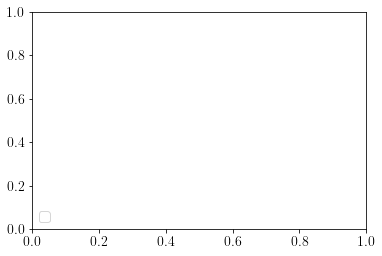

In [16]:
plt.legend(loc=3)

7.141790511357606